In [1]:
from neural_bench.network import Network
from neural_bench.fc_layer import FCLayer
from neural_bench.quantized_layer import QuantizedLayer
from neural_bench.activation_layer import ActivationLayer
from neural_bench.activations import tanh, tanh_prime
from neural_bench.losses import mse, mse_prime

from keras.datasets import mnist
#from keras.utils import to_categorical
from keras import utils as np_utils
import numpy as np
import matplotlib.pyplot as plt


SIZE=2000

Now start loading the data

In [2]:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    # training data : 60000 samples
    # reshape and normalize input data
    train_images = train_images.reshape(train_images.shape[0], 1, 28*28)
    train_images = train_images.astype('float32')
    train_images /= 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    train_labels = np_utils.to_categorical(train_labels)

    # same for test data : 10000 samples
    test_images = test_images.reshape(test_images.shape[0], 1, 28*28)
    test_images = test_images.astype('float32')
    test_images /= 255
    # test_labels = np_utils.to_categorical(test_labels)

In [3]:
test_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [4]:
train_labels[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Let's build a network   

In [5]:
    net = Network()
    net.add(FCLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
    net.add(ActivationLayer(tanh, tanh_prime))
    net.use(mse, mse_prime)


we can start training

In [6]:
    print('Start training')
    net.fit(train_images[0:SIZE], train_labels[0:SIZE], epochs=35, learning_rate=0.1)

Start training
Training: [####################] 35/35 Done...               


Time to test

In [7]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # predicted_label = np.argmax(predictions_array)
  # if predicted_label == true_label:
  #   color = 'blue'
  # else:
  #   color = 'red'

  # plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
  #                               100*np.max(predictions_array),
  #                               true_label),
  #                               color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [8]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
# allow ourselves to offset in the test_images array
offset = 0
predictions = net.predict(test_images[0+offset:num_images+offset])

predictions[0]

array([[-0.01216384, -0.0149842 ,  0.03198479, -0.00281766, -0.01515279,
         0.00412238,  0.00706099,  0.99868831,  0.02748789,  0.02649879]])

In [9]:
np.argmax(predictions[0])

7

In [10]:
len(predictions)

15

TypeError: only length-1 arrays can be converted to Python scalars

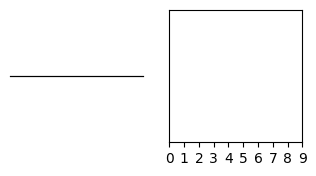

In [12]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+offset, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()